In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

In [2]:
df_weather = pd.read_csv('../assets/weather.csv')
df_spray = pd.read_csv('../assets/spray.csv')
df_train = pd.read_csv('../assets/train.csv')
df_test = pd.read_csv('../assets/test.csv')

In [3]:
print('weather',df_weather.shape)
print('spray',df_spray.shape)
print('train',df_train.shape)
print('test',df_test.shape)

weather (2944, 22)
spray (14835, 4)
train (10506, 12)
test (116293, 11)


In [4]:
df_weather.sort_values(by='Date').head(1)

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,0448,1849,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2


In [5]:
df_weather.sort_values(by='Date').tail(1)

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
2943,2,2014-10-31,49,34,42,M,29,36,23,0,-,-,RA SN BR,M,M,M,0.04,29.54,30.20,21.7,34,22.6


In [6]:
df_spray.sort_values(by='Date').head(1)

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163


In [7]:
df_spray.sort_values(by='Date').tail(1)

,Date,Time,Latitude,Longitude
14834,2013-09-05,8:35:41 PM,42.004805,-87.81746


In [8]:
df_spray['Date'].nunique()

10

In [9]:
# Spraying was carried out on 10 unique dates
# For each spray date, multiple locations were sprayed
df_spray.groupby('Date').count()

,Time,Latitude,Longitude
Date,,,
2011-08-29,95,95,95
2011-09-07,1530,2114,2114
2013-07-17,2202,2202,2202
2013-07-25,1607,1607,1607
2013-08-08,1195,1195,1195
2013-08-15,2668,2668,2668
2013-08-16,141,141,141
2013-08-22,1587,1587,1587
2013-08-29,2302,2302,2302


In [10]:
df_spray[df_spray['Date']=='2013-07-17'].head(10)

,Date,Time,Latitude,Longitude
2209,2013-07-17,7:45:45 PM,41.997728,-87.767532
2210,2013-07-17,7:45:55 PM,41.997990,-87.768085
2211,2013-07-17,7:46:05 PM,41.998237,-87.768623
2212,2013-07-17,7:46:15 PM,41.998510,-87.769225
2213,2013-07-17,7:46:25 PM,41.998793,-87.769833
2214,2013-07-17,7:46:35 PM,41.999080,-87.770452
2215,2013-07-17,7:46:45 PM,41.999377,-87.771073
2216,2013-07-17,7:46:55 PM,41.999675,-87.771713
2217,2013-07-17,7:47:04 PM,41.999958,-87.772302
2218,2013-07-17,7:47:15 PM,42.000262,-87.772937


In [11]:
df_test[(df_test['Date']>='2013-07-19') & (df_test['Date']<='2013-10-19')]

,Id,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy


In [12]:
df_train.sort_values(by='Date').head(1)

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0


In [13]:
df_train.sort_values(by='Date').tail(1)

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
10505,2013-09-26,"4200 West 65th Street, Chicago, IL 60621, USA",CULEX PIPIENS/RESTUANS,42,W 65TH ST,T235,"4200 W 65TH ST, Chicago, IL",41.776428,-87.627096,8,1,0


In [14]:
df_test.sort_values(by='Date').head(1)

,Id,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy
0,1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9


In [15]:
df_test.sort_values(by='Date').tail(1)

,Id,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy
116292,116293,2014-10-02,"2100 North Cannon Drive, Chicago, IL 60614, USA",CULEX ERRATICUS,21,N CANNON DR,T054C,"2100 N CANNON DR, Chicago, IL",41.925652,-87.63359,8


### Summary of the timelines across the data sets
1) Weather: 2007-05-01 to 2014-10-31<br>
2) Spray:   2011-08-29 to 2013-09-05<br>
3) Train:   2007-05-29 to 2013-09-26<br>
4) Test:    2008-06-11 to 2014-10-02<br><br>
Check effects of weather on virus by considering only the period 2007-05-29 to 2011-08-29 (this is the period before spraying started). This will give us the most important weather features for the model.<br>

Spraying took place on 10 seperate days in 2011 & 2013. No records of spraying on the days in Test data. Thus, we can be certain that our predictions for Test data will not consider spraying. i.e. 100% based on weather data only.<br>

Weather data is available for all Test data. <br>


# Weather data

In [16]:
df_weather.head(50)
# CodeSum onwards

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,0448,1849,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,-,-,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,0447,1850,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,-,-,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,0446,1851,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9
5,2,2007-05-03,67,48,58,M,40,50,7,0,-,-,HZ,M,M,M,0.00,29.46,30.12,12.9,6,13.2
6,1,2007-05-04,66,49,58,4,41,50,7,0,0444,1852,RA,0,M,0.0,T,29.31,30.05,10.4,8,10.8
7,2,2007-05-04,78,51,M,M,42,50,M,M,-,-,,M,M,M,0.00,29.36,30.04,10.1,7,10.4
8,1,2007-05-05,66,53,60,5,38,49,5,0,0443,1853,,0,M,0.0,T,29.40,30.10,11.7,7,12.0
9,2,2007-05-05,66,54,60,M,39,50,5,0,-,-,,M,M,M,T,29.46,30.09,11.2,7,11.5


In [17]:
df_weather_trunc= df_weather.drop(['Tmax','Tmin','Tavg','Depart','DewPoint',
                                   'WetBulb','Heat','Cool','Sunrise','Sunset'],axis=1)

In [18]:
#drop column Water1 since all values are missing in this column
print(df_weather_trunc[df_weather_trunc['Water1']=='M']['Station'].count())
df_weather_trunc.drop(['Water1'],axis=1,inplace=True)

2944


In [19]:
print(df_weather_trunc['Depth'].value_counts())
print(df_weather_trunc['SnowFall'].value_counts())

M    1472
0    1472
Name: Depth, dtype: int64
M      1472
0.0    1459
  T      12
0.1       1
Name: SnowFall, dtype: int64


In [20]:
# 'Depth' is either 0 or M across all records
# 'SnowFall' is either 0 or M in most cases, with only 13 rows (0.44%) offering other info. 
# Drop 'Depth' and 'SnowFall' because these will not provide statistically significant information.
df_weather_trunc.drop(['Depth','SnowFall'],axis=1,inplace=True)

#### Check Data Types

In [21]:
# check data types
df_weather_trunc.dtypes

Station          int64
Date            object
CodeSum         object
PrecipTotal     object
StnPressure     object
SeaLevel        object
ResultSpeed    float64
ResultDir        int64
AvgSpeed        object
dtype: object

In [22]:
# convert 'Date' into the correct data types
df_weather_trunc['Date'] = pd.to_datetime(df_weather_trunc['Date'])

In [23]:
df_weather_trunc['PrecipTotal'].value_counts();
# From the value_counts(), there are 2 rows with value 'M'. To drop these 2 rows.
# There are also 318 rows with value '   T'. This stands for Trace, which means it is a small value but > 0.00 
# There are 127 rows with value 0.01. This is the smallest value that is > 0. 
# There are 1577 rows with value 0.00.
# Based on the above, it would be reasonable to assume that 0.00 < T < 0.01
# Therefore, it would be resonable to set T = 0.005
df_weather_trunc['PrecipTotal'] = [0.005 if i =='  T' else i for i in df_weather_trunc['PrecipTotal']]

In [24]:
df_weather_trunc[df_weather_trunc['PrecipTotal']=='M']

,Station,Date,CodeSum,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
117,2,2007-06-28,,M,29.43,30.07,12.2,2,13.3
119,2,2007-06-29,,M,29.47,30.11,7.4,2,8.2


##### DROP ROW (x2)

In [25]:
df_weather_trunc.drop(labels=[117, 119],inplace=True)

In [26]:
df_weather_trunc.shape

(2942, 9)

In [27]:
# convert 'PrecipTotal' into the correct data type
df_weather_trunc['PrecipTotal'] = pd.to_numeric(df_weather_trunc['PrecipTotal'])

In [28]:
df_weather_trunc[df_weather_trunc['StnPressure']=='M']

,Station,Date,CodeSum,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
87,2,2007-06-13,,0.0,M,M,7.0,5,M
848,1,2009-06-26,,0.0,M,29.85,6.4,4,8.2
2410,1,2013-08-10,,0.0,M,30.08,5.3,5,6.5
2411,2,2013-08-10,,0.0,M,30.07,6.0,6,7.4


In [29]:
df_weather_trunc['StnPressure'] = [np.nan if i=='M' else i for i in df_weather_trunc['StnPressure']]

In [30]:
# convert 'StnPressure' into the correct data type
df_weather_trunc['StnPressure'] = pd.to_numeric(df_weather_trunc['StnPressure'])

In [31]:
df_weather_trunc[df_weather_trunc['SeaLevel']=='M']

,Station,Date,CodeSum,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
87,2,2007-06-13,,0.000,NaN,M,7.0,5,M
832,1,2009-06-18,RA BR,0.120,29.08,M,6.7,16,7.9
994,1,2009-09-07,BR,0.000,29.39,M,5.8,3,4.0
1732,1,2011-09-08,RA,0.005,29.34,M,13.0,2,13.4
1745,2,2011-09-14,RA BR HZ FU,0.005,29.47,M,6.0,32,M
1756,1,2011-09-20,MIFG BCFG BR,0.000,29.26,M,7.3,18,7.3
2067,2,2012-08-22,,0.000,29.39,M,4.7,19,M
2090,1,2012-09-03,BR,0.000,29.17,M,4.6,6,4.4
2743,2,2014-07-23,,0.000,29.47,M,16.4,2,16.7


In [32]:
df_weather_trunc['SeaLevel'] = [np.nan if i=='M' else i for i in df_weather_trunc['SeaLevel']]

In [33]:
# convert 'SeaLevel' into the correct data type
df_weather_trunc['SeaLevel'] = pd.to_numeric(df_weather_trunc['SeaLevel'])

In [34]:
df_weather_trunc[df_weather_trunc['ResultSpeed']=='M']

C:\Users\XXX\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,Station,Date,CodeSum,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed


In [35]:
df_weather_trunc[df_weather_trunc['ResultDir']=='M']

,Station,Date,CodeSum,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed


In [36]:
df_weather_trunc['ResultSpeed'].value_counts();

In [37]:
# convert 'ResultSpeed' into the correct data type
df_weather_trunc['ResultSpeed'] = pd.to_numeric(df_weather_trunc['ResultSpeed'])

In [38]:
df_weather_trunc['AvgSpeed'].value_counts();

In [39]:
df_weather_trunc[df_weather_trunc['AvgSpeed']=='M']

,Station,Date,CodeSum,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
87,2,2007-06-13,,0.000,NaN,NaN,7.0,5,M
1745,2,2011-09-14,RA BR HZ FU,0.005,29.47,NaN,6.0,32,M
2067,2,2012-08-22,,0.000,29.39,NaN,4.7,19,M


In [40]:
df_weather_trunc['AvgSpeed'] = [np.nan if i=='M' else i for i in df_weather_trunc['AvgSpeed']]

In [41]:
# convert 'AvgSpeed' into the correct data type
df_weather_trunc['AvgSpeed'] = pd.to_numeric(df_weather_trunc['AvgSpeed'])

In [42]:
df_weather_trunc[df_weather_trunc['AvgSpeed'].isna()]

,Station,Date,CodeSum,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
87,2,2007-06-13,,0.000,NaN,NaN,7.0,5,NaN
1745,2,2011-09-14,RA BR HZ FU,0.005,29.47,NaN,6.0,32,NaN
2067,2,2012-08-22,,0.000,29.39,NaN,4.7,19,NaN


In [43]:
# drop the above 2 rows were AvgSpeed is NaN.
df_weather_trunc.drop(labels=[1745,2067],inplace=True)

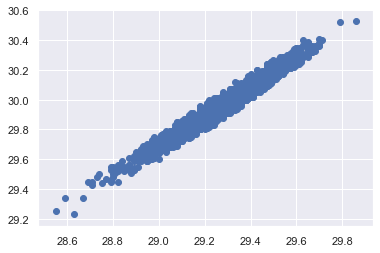

In [44]:
plt.scatter(df_weather_trunc['StnPressure'],df_weather_trunc['SeaLevel'])

#### 'StnPressure' (x axis) and 'SeaLevel' (y axis) pressures are closely linearly correlated.
SeaLevel pressure is approximately 0.6 to 0.8 more than StnPressure, since the stations are elevated above sea-level (thus experiencing lower atmospheric pressure). Accordingly, we can estimate that SeaLevel is roughly 0.7 more than StnPressure. Conversely, we can estimate that StnPressure is roughly 0.7 less than SeaLevel.
Since both are closely linearly correlated, we really only need one of them (the other can be dropped).

In [45]:
print(df_weather_trunc[df_weather_trunc['StnPressure'].isna()]['Station'].count())
print(df_weather_trunc[df_weather_trunc['SeaLevel'].isna()]['Station'].count())

4
7


In [46]:
df_weather_trunc[(df_weather_trunc['StnPressure'].isna()) | (df_weather_trunc['SeaLevel'].isna())]

,Station,Date,CodeSum,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
87,2,2007-06-13,,0.000,NaN,NaN,7.0,5,NaN
832,1,2009-06-18,RA BR,0.120,29.08,NaN,6.7,16,7.9
848,1,2009-06-26,,0.000,NaN,29.85,6.4,4,8.2
994,1,2009-09-07,BR,0.000,29.39,NaN,5.8,3,4.0
1732,1,2011-09-08,RA,0.005,29.34,NaN,13.0,2,13.4
1756,1,2011-09-20,MIFG BCFG BR,0.000,29.26,NaN,7.3,18,7.3
2090,1,2012-09-03,BR,0.000,29.17,NaN,4.6,6,4.4
2410,1,2013-08-10,,0.000,NaN,30.08,5.3,5,6.5
2411,2,2013-08-10,,0.000,NaN,30.07,6.0,6,7.4
2743,2,2014-07-23,,0.000,29.47,NaN,16.4,2,16.7


In [47]:
# Drop the row where both 'StnPressure', 'SeaLevel' and 'AvgSpeed' are NaN
df_weather_trunc.drop(labels=87,inplace=True)

# FIX THIS! (affects 9 rows)

In [48]:
# NEED TO GIVE THIS A PERMANENT FIX ***************************

# Since SeaLevel has more NaN cases, we will drop SeaLevel.
# However, we will first impute missing values into StnPressure, where StnPressure = Sealevel - 0.7
df_weather_trunc['StnPressure'] = [29.5 if np.isnan(i) else i for i in df_weather_trunc['StnPressure']]

df_weather_trunc.drop(labels=['SeaLevel'],axis=1,inplace=True)

In [49]:
df_weather_trunc.shape

(2939, 8)

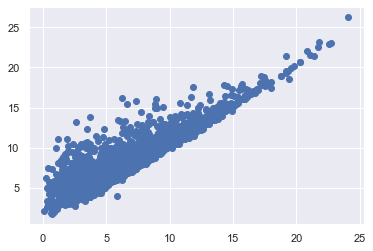

In [50]:
plt.scatter(df_weather_trunc['ResultSpeed'],df_weather_trunc['AvgSpeed'])

#### 'ResultSpeed' (x axis) and 'AvgSpeed' (y axis) are closely linearly correlated.
Since both are closely linearly correlated, we really only need one of them (the other can be dropped).
Will drop 'AvgSpeed'

In [51]:
df_weather_trunc.drop(labels=['AvgSpeed'],axis=1,inplace=True)

In [52]:
df_weather_trunc['StnPressure']

0       29.10
1       29.18
2       29.38
3       29.44
4       29.39
5       29.46
6       29.31
7       29.36
8       29.40
9       29.46
10      29.57
11      29.62
12      29.38
13      29.44
14      29.29
15      29.36
16      29.21
17      29.28
18      29.20
19      29.26
20      29.33
21      29.39
22      29.49
23      29.54
24      29.49
25      29.55
26      29.23
27      29.31
28      29.13
29      29.19
30      29.33
31      29.39
32      29.55
33      29.62
34      29.53
35      29.60
36      29.34
37      29.41
38      29.38
39      29.44
40      29.33
41      29.39
42      29.34
43      29.41
44      29.39
45      29.47
46      29.41
47      29.47
48      29.51
49      29.57
50      29.36
51      29.42
52      29.34
53      29.41
54      29.43
55      29.49
56      29.39
57      29.44
58      29.31
59      29.38
60      29.28
61      29.34
62      29.19
63      29.25
64      29.03
65      29.10
66      28.82
67      28.87
68      28.82
69      28.88
70      29.10
71    

### Deal with 'CodeSum'

In [53]:
df_weather_trunc['CodeSum'].value_counts();

In [54]:
# Extract all the 'CodeSum' component values (e.g. RA, HZ, FU, FG+ etc.)
# Note that this weather data will have to be used together with the test data
# Note that this set of weather data includes the period covered by both the Train and Test data
# So for training, we will use the subset of weather data for the period in the Train data (2007-05-29 to 2013-09-26)
# For testing, we will use the subset of weather data for the period of the Test data (2008-06-11 to 2014-10-02)

# global variable
code_sum_list = []

def get_code_sum_elems(code_sum_string):
    global code_sum_list # use the global variable
    # extend the global variable with this_list
    code_sum_list.extend(code_sum_string.split())
    return True

for i in df_weather_trunc['CodeSum']:
    get_code_sum_elems(i.strip())

code_sum_set = set(code_sum_list)
print(code_sum_set)

{'VCTS', 'RA', 'BCFG', 'SQ', 'VCFG', 'GR', 'HZ', 'BR', 'SN', 'FG+', 'MIFG', 'FG', 'DZ', 'TSRA', 'FU', 'TS'}


In [55]:
# For each CodeSum element, create a column (total of 16 columns)
for i in code_sum_set:
    df_weather_trunc[i] = 0

In [56]:
df_weather_trunc.head(5)

,Station,Date,CodeSum,PrecipTotal,StnPressure,ResultSpeed,ResultDir,VCTS,RA,BCFG,SQ,VCFG,GR,HZ,BR,SN,FG+,MIFG,FG,DZ,TSRA,FU,TS
0,1,2007-05-01,,0.0,29.10,1.7,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,2007-05-01,,0.0,29.18,2.7,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,2007-05-02,BR,0.0,29.38,13.0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,2007-05-02,BR HZ,0.0,29.44,13.3,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,2007-05-03,,0.0,29.39,11.7,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [57]:
df_weather_trunc.shape

(2939, 23)

In [58]:
for index, row in df_weather_trunc.iterrows():
    cs_list = row['CodeSum'].split() # split the CodeSum string
    for j in cs_list:
        #set corresponding column to 1
        if j in code_sum_set:
            df_weather_trunc.loc[index,j]=1

In [59]:
df_weather_trunc.head(5)

,Station,Date,CodeSum,PrecipTotal,StnPressure,ResultSpeed,ResultDir,VCTS,RA,BCFG,SQ,VCFG,GR,HZ,BR,SN,FG+,MIFG,FG,DZ,TSRA,FU,TS
0,1,2007-05-01,,0.0,29.10,1.7,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,2007-05-01,,0.0,29.18,2.7,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,2007-05-02,BR,0.0,29.38,13.0,4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,2,2007-05-02,BR HZ,0.0,29.44,13.3,2,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0
4,1,2007-05-03,,0.0,29.39,11.7,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Drop column 'CodeSum'

In [60]:
df_weather_trunc.drop(labels='CodeSum',axis=1,inplace=True)

In [61]:
df_weather_trunc.shape

(2939, 22)

#### Split the weather data into Stn1 & Stn2

In [62]:
df_weather_trunc_stn1 = df_weather_trunc[df_weather_trunc['Station']==1]
df_weather_trunc_stn2 = df_weather_trunc[df_weather_trunc['Station']==2]

In [63]:
print(df_weather_trunc_stn1.shape)
print(df_weather_trunc_stn2.shape)

(1472, 22)
(1467, 22)


# Train data

In [64]:
# Set variables for Latitude, Longitude of weather stations 1 & 2
# This will be used to calculate the distance (as the crow flies) between stations and observation points
stn1_location = (41.995,-87.933)
stn2_location = (47.786,-87.752)

def direct_distance(x1, x2, y1, y2):
    return np.sqrt(((x1-x2)**2) + ((y1-y2)**2))

def find_nearest_stn(latitude, longitude):
    dist_from_stn1 = direct_distance(latitude, stn1_location[0], longitude, stn1_location[1])  
    dist_from_stn2 = direct_distance(latitude, stn2_location[0], longitude, stn2_location[1])
    if dist_from_stn1 <= dist_from_stn2:
        return 1
    else:
        return 2

### Commented out the following 3 cells due to long run-time.

In [65]:
# # For each observation (row), check distance to nearest weather station
# # Assign 'stn_ref' to the nearest weather station (either 1 or 2)
# # Initialize new column
# df_train['stn_ref'] = 0
# for index, row in df_train.iterrows():
#     nearest_station = find_nearest_stn(row['Latitude'],row['Longitude'])
#     df_train.loc[index,'stn_ref'] = nearest_station

# df_train[df_train['stn_ref']==1]['stn_ref'].count()
# df_train[df_train['stn_ref']==2]['stn_ref'].count()

In [66]:
# # For each observation (row), check distance to nearest weather station
# # Assign 'stn_ref' to the nearest weather station (either 1 or 2)
# # Initialize new column
# df_test['stn_ref'] = 0
# for index, row in df_test.iterrows():
#     nearest_station = find_nearest_stn(row['Latitude'],row['Longitude'])
#     df_test.loc[index,'stn_ref'] = nearest_station

# print(df_test[df_test['stn_ref']==1]['stn_ref'].count())
# print(df_test[df_test['stn_ref']==2]['stn_ref'].count())

In [67]:
# # For each observation (row), check distance to nearest weather station
# # Assign 'stn_ref' to the nearest weather station (either 1 or 2)
# # Initialize new column
# df_spray['stn_ref'] = 0
# for index, row in df_spray.iterrows():
#     nearest_station = find_nearest_stn(row['Latitude'],row['Longitude'])
#     df_spray.loc[index,'stn_ref'] = nearest_station    
    
# print(df_spray[df_spray['stn_ref']==1]['stn_ref'].count())
# print(df_spray[df_spray['stn_ref']==2]['stn_ref'].count())

#### The above confirms that:
1) All training data to use Stn 1 as the reference station<br>
2) All test data to use Stn 1 as the reference station<br>
3) All spraying was carried out nearer to Stn1<br><br>
Therefore, we can simply ignore the WEATHER DATA from Station 2. ===> use only df_weather_trunc_stn1

drop AddressAccuracy: this is specific to the geocoder used (no info provided), but should not affect in this case.
drop Address, Block, Street, AddressNumberAndStreet,Trap, NumMosquitos as no evidence there is any relevance

In [68]:
df_train.drop(['AddressAccuracy','Address','Block','Street',
               'AddressNumberAndStreet','Trap','NumMosquitos'], axis=1, inplace=True)

In [69]:
df_train.dtypes

Date           object
Species        object
Latitude      float64
Longitude     float64
WnvPresent      int64
dtype: object

In [70]:
df_train['Date'] = pd.to_datetime(df_train['Date'],yearfirst=True)

In [71]:
df_train[df_train['WnvPresent']==1]['Date'].count()

551

In [72]:
df_train['Species'][df_train['WnvPresent']==1].value_counts()

CULEX PIPIENS/RESTUANS    262
CULEX PIPIENS             240
CULEX RESTUANS             49
Name: Species, dtype: int64

In [73]:
df_train['Species'][df_train['WnvPresent']==0].value_counts()

CULEX PIPIENS/RESTUANS    4490
CULEX RESTUANS            2691
CULEX PIPIENS             2459
CULEX TERRITANS            222
CULEX SALINARIUS            86
CULEX TARSALIS               6
CULEX ERRATICUS              1
Name: Species, dtype: int64

In [74]:
df_train[df_train['WnvPresent']==1].sort_values(by='Date')

,Date,Species,Latitude,Longitude,WnvPresent
553,2007-07-18,CULEX PIPIENS/RESTUANS,41.686398,-87.531635,1
603,2007-07-25,CULEX PIPIENS/RESTUANS,41.673408,-87.599862,1
611,2007-07-25,CULEX PIPIENS/RESTUANS,41.673408,-87.599862,1
618,2007-07-25,CULEX PIPIENS,41.673408,-87.599862,1
660,2007-07-25,CULEX PIPIENS,41.673408,-87.599862,1
661,2007-07-25,CULEX PIPIENS,41.673408,-87.599862,1
1310,2007-08-01,CULEX PIPIENS/RESTUANS,41.702724,-87.536497,1
1309,2007-08-01,CULEX PIPIENS/RESTUANS,41.702724,-87.536497,1
1306,2007-08-01,CULEX PIPIENS/RESTUANS,41.702724,-87.536497,1
1250,2007-08-01,CULEX PIPIENS/RESTUANS,41.726465,-87.585413,1


In [75]:
df_train.groupby('Date').agg({'WnvPresent':'mean'})

,WnvPresent
Date,
2007-05-29,0.000000
2007-06-05,0.000000
2007-06-26,0.000000
2007-06-29,0.000000
2007-07-02,0.000000
2007-07-11,0.000000
2007-07-18,0.007752
2007-07-19,0.000000
2007-07-25,0.054348


In [76]:
df_train[df_train['Date']=='2007-07-25']['WnvPresent'].value_counts()

0    87
1     5
Name: WnvPresent, dtype: int64

In [77]:
df_train[df_train['Date']=='2009-09-14']['WnvPresent'].value_counts()

0    108
1      3
Name: WnvPresent, dtype: int64

In [78]:
df_train[df_train['Date']=='2011-09-12']['WnvPresent'].value_counts()

0    132
1      6
Name: WnvPresent, dtype: int64

In [79]:
df_train[df_train['Date']=='2013-07-19']['WnvPresent'].value_counts()

0    167
1     15
Name: WnvPresent, dtype: int64

### Data to be used to train our model for predicting presence of WNV (7574 rows)

In [80]:
# check number of "train" records between 2007-05-29 & 2011-08-29 (both date inclusive)
# during this period, there was no record of insecticide spraying
# therefore, this period can give us a more accurate analysis of the effects of weather (only) on WNV presence
df_train[(df_train['Date'] >= '2007-05-29') & (df_train['Date'] <= '2011-08-29')]['Date'].count()

7574

### Merge Train & Weather data (from Station 1 only)

In [81]:
df_weather_trunc_stn1.shape

(1472, 22)

In [82]:
df_train.shape

(10506, 5)

In [83]:
df_train_weather_merged = pd.merge(df_train, df_weather_trunc_stn1, on='Date', how='left')
print(df_train_weather_merged.shape)
df_train_weather_merged.head()

(10506, 26)


,Date,Species,Latitude,Longitude,WnvPresent,Station,PrecipTotal,StnPressure,ResultSpeed,ResultDir,VCTS,RA,BCFG,SQ,VCFG,GR,HZ,BR,SN,FG+,MIFG,FG,DZ,TSRA,FU,TS
0,2007-05-29,CULEX PIPIENS/RESTUANS,41.954690,-87.800991,0,1,0.0,29.39,5.8,18,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0
1,2007-05-29,CULEX RESTUANS,41.954690,-87.800991,0,1,0.0,29.39,5.8,18,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0
2,2007-05-29,CULEX RESTUANS,41.994991,-87.769279,0,1,0.0,29.39,5.8,18,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0
3,2007-05-29,CULEX PIPIENS/RESTUANS,41.974089,-87.824812,0,1,0.0,29.39,5.8,18,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0
4,2007-05-29,CULEX RESTUANS,41.974089,-87.824812,0,1,0.0,29.39,5.8,18,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0


### Merge Test & Weather data (from Station 1 only) - do this later

### At this point, training data is merged with weather data (station 1). Check for strong predictors.

In [84]:
# plt.scatter(df_train_weather_merged['PrecipTotal'],df_train_weather_merged['WnvPresent'])

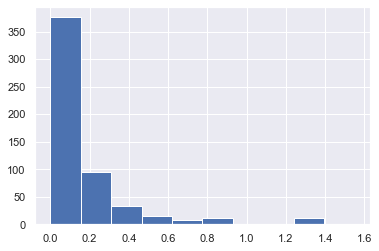

In [85]:
plt.hist(df_train_weather_merged[df_train_weather_merged['WnvPresent']==1]['PrecipTotal']);

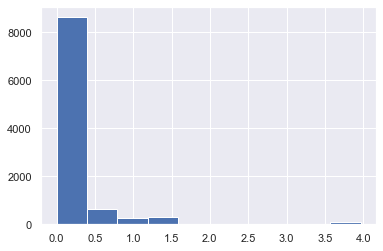

In [86]:
plt.hist(df_train_weather_merged[df_train_weather_merged['WnvPresent']==0]['PrecipTotal']);

In [88]:
# plt.scatter(df_train_weather_merged['WnvPresent'],df_train_weather_merged['StnPressure'])

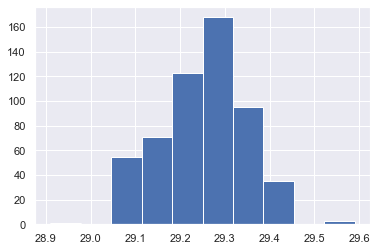

In [89]:
plt.hist(df_train_weather_merged[df_train_weather_merged['WnvPresent']==1]['StnPressure']);

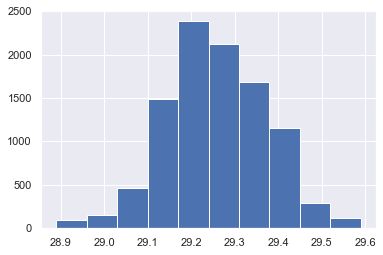

In [90]:
plt.hist(df_train_weather_merged[df_train_weather_merged['WnvPresent']==0]['StnPressure']);

In [ ]:
# plt.scatter(df_train_weather_merged['WnvPresent'],df_train_weather_merged['ResultSpeed'])

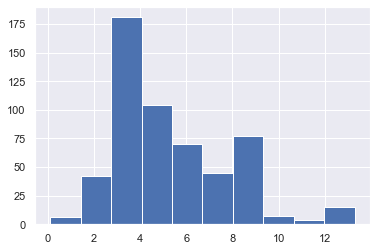

In [91]:
plt.hist(df_train_weather_merged[df_train_weather_merged['WnvPresent']==1]['ResultSpeed']);

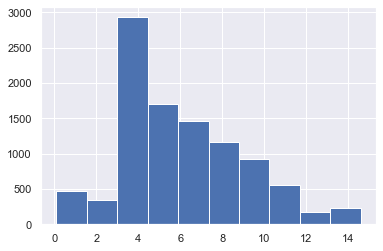

In [92]:
plt.hist(df_train_weather_merged[df_train_weather_merged['WnvPresent']==0]['ResultSpeed']);

In [ ]:
# plt.scatter(df_train_weather_merged['WnvPresent'],df_train_weather_merged['ResultDir'])

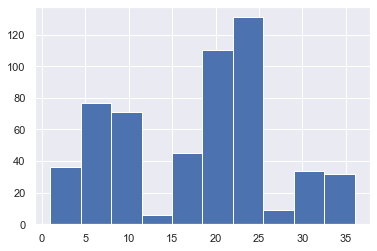

In [93]:
plt.hist(df_train_weather_merged[df_train_weather_merged['WnvPresent']==1]['ResultDir']);

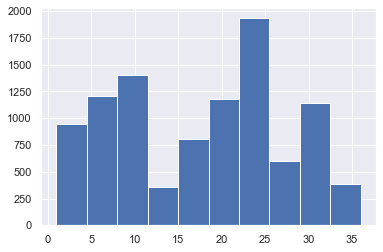

In [94]:
plt.hist(df_train_weather_merged[df_train_weather_merged['WnvPresent']==0]['ResultDir']);

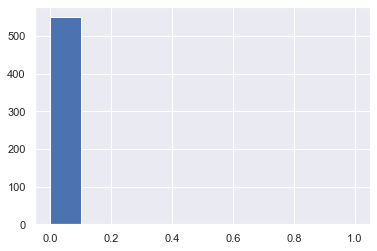

In [100]:
plt.hist(df_train_weather_merged[df_train_weather_merged['WnvPresent']==1]['VCTS']);

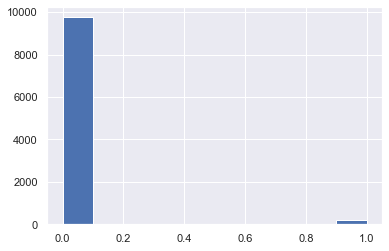

In [101]:
plt.hist(df_train_weather_merged[df_train_weather_merged['WnvPresent']==0]['VCTS']);

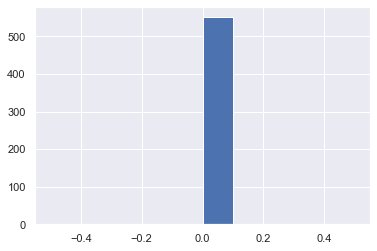

In [98]:
plt.hist(df_train_weather_merged[df_train_weather_merged['WnvPresent']==1]['VCFG']);

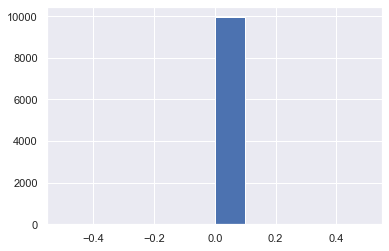

In [99]:
plt.hist(df_train_weather_merged[df_train_weather_merged['WnvPresent']==0]['VCFG']);

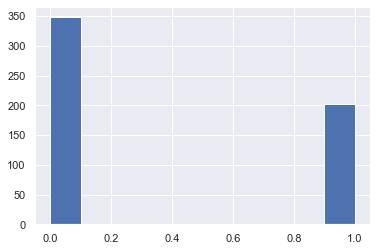

In [102]:
plt.hist(df_train_weather_merged[df_train_weather_merged['WnvPresent']==1]['RA']);

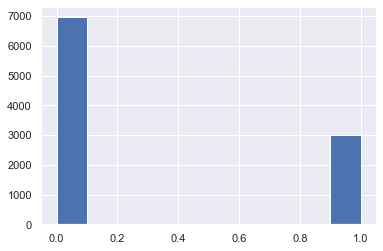

In [103]:
plt.hist(df_train_weather_merged[df_train_weather_merged['WnvPresent']==0]['RA']);

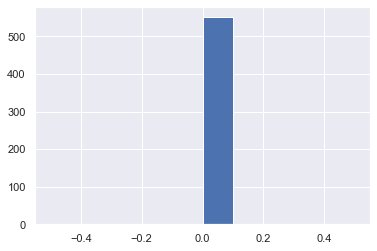

In [104]:
plt.hist(df_train_weather_merged[df_train_weather_merged['WnvPresent']==1]['SQ']);

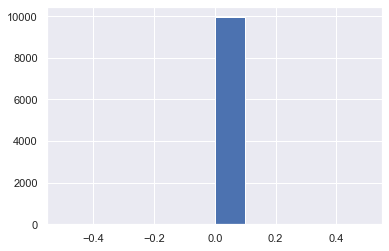

In [105]:
plt.hist(df_train_weather_merged[df_train_weather_merged['WnvPresent']==0]['SQ']);

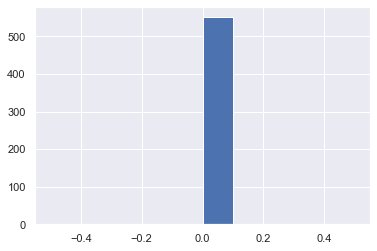

In [106]:
plt.hist(df_train_weather_merged[df_train_weather_merged['WnvPresent']==1]['BCFG']);

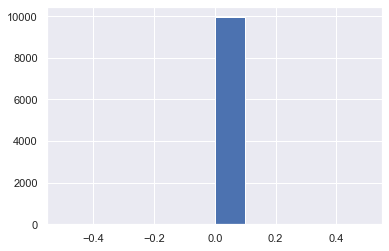

In [107]:
plt.hist(df_train_weather_merged[df_train_weather_merged['WnvPresent']==0]['BCFG']);

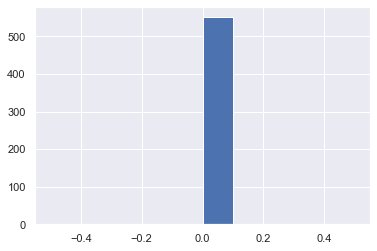

In [108]:
plt.hist(df_train_weather_merged[df_train_weather_merged['WnvPresent']==1]['GR']);

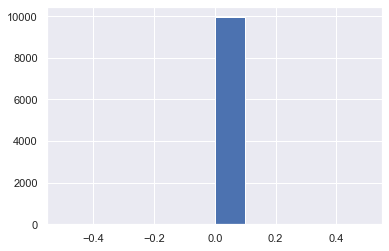

In [109]:
plt.hist(df_train_weather_merged[df_train_weather_merged['WnvPresent']==0]['GR']);

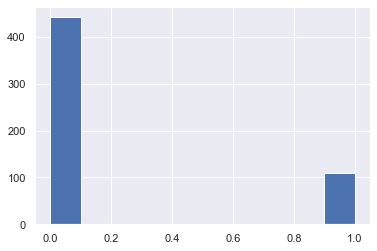

In [110]:
plt.hist(df_train_weather_merged[df_train_weather_merged['WnvPresent']==1]['HZ']);

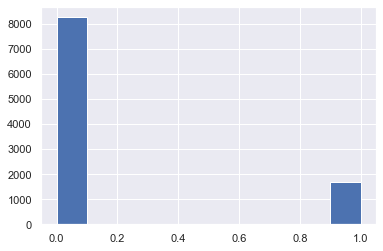

In [111]:
plt.hist(df_train_weather_merged[df_train_weather_merged['WnvPresent']==0]['HZ']);

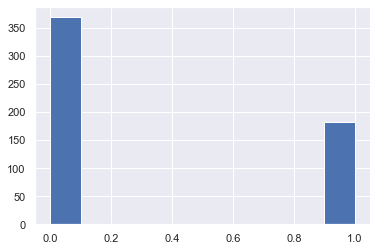

In [112]:
plt.hist(df_train_weather_merged[df_train_weather_merged['WnvPresent']==1]['BR']);

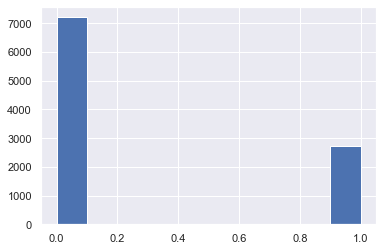

In [113]:
plt.hist(df_train_weather_merged[df_train_weather_merged['WnvPresent']==0]['BR']);

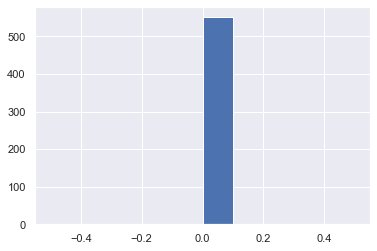

In [114]:
plt.hist(df_train_weather_merged[df_train_weather_merged['WnvPresent']==1]['SN']);

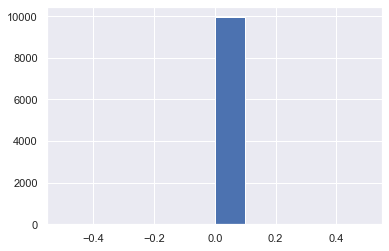

In [115]:
plt.hist(df_train_weather_merged[df_train_weather_merged['WnvPresent']==0]['SN']);

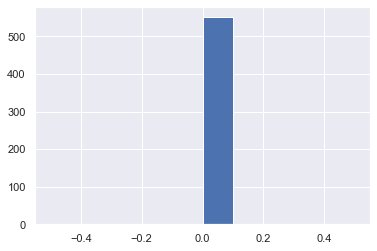

In [116]:
plt.hist(df_train_weather_merged[df_train_weather_merged['WnvPresent']==1]['FG+']);

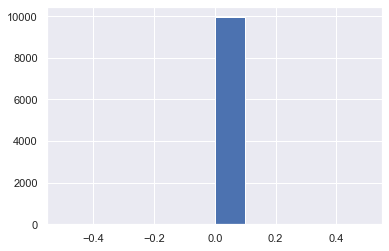

In [117]:
plt.hist(df_train_weather_merged[df_train_weather_merged['WnvPresent']==0]['FG+']);

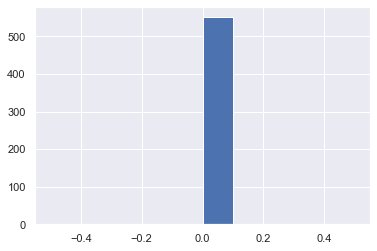

In [118]:
plt.hist(df_train_weather_merged[df_train_weather_merged['WnvPresent']==1]['MIFG']);

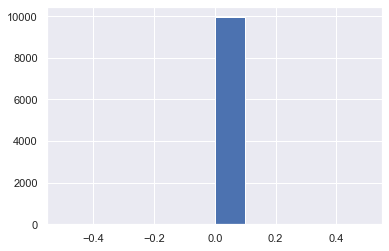

In [119]:
plt.hist(df_train_weather_merged[df_train_weather_merged['WnvPresent']==0]['MIFG']);

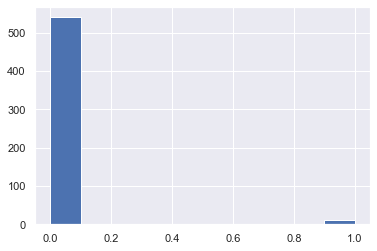

In [120]:
plt.hist(df_train_weather_merged[df_train_weather_merged['WnvPresent']==1]['FG']);

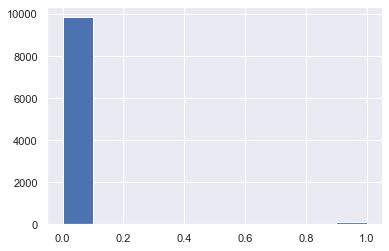

In [121]:
plt.hist(df_train_weather_merged[df_train_weather_merged['WnvPresent']==0]['FG']);

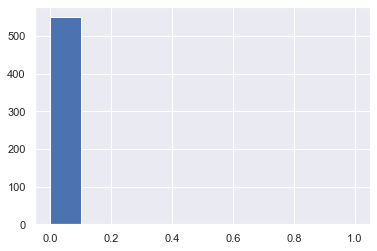

In [122]:
plt.hist(df_train_weather_merged[df_train_weather_merged['WnvPresent']==1]['DZ']);

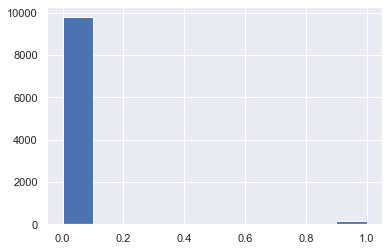

In [123]:
plt.hist(df_train_weather_merged[df_train_weather_merged['WnvPresent']==0]['DZ']);

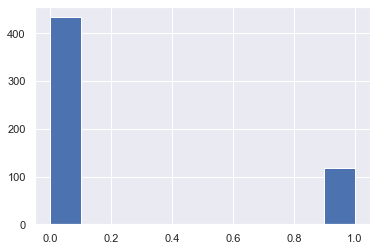

In [124]:
plt.hist(df_train_weather_merged[df_train_weather_merged['WnvPresent']==1]['TSRA']);

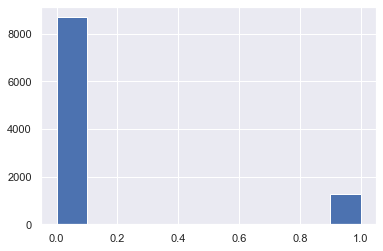

In [125]:
plt.hist(df_train_weather_merged[df_train_weather_merged['WnvPresent']==0]['TSRA']);

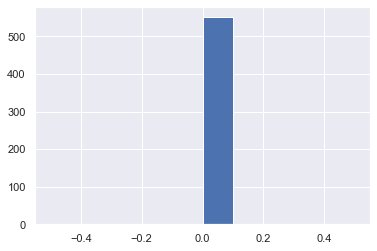

In [126]:
plt.hist(df_train_weather_merged[df_train_weather_merged['WnvPresent']==1]['FU']);

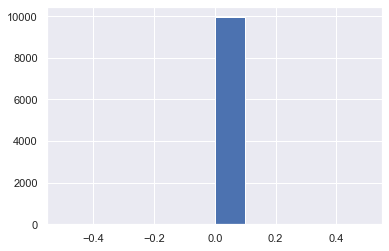

In [127]:
plt.hist(df_train_weather_merged[df_train_weather_merged['WnvPresent']==0]['FU']);

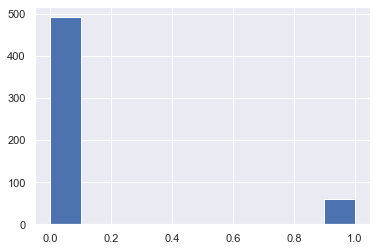

In [128]:
plt.hist(df_train_weather_merged[df_train_weather_merged['WnvPresent']==1]['TS']);

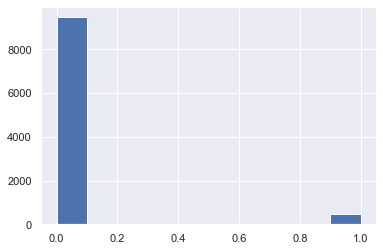

In [129]:
plt.hist(df_train_weather_merged[df_train_weather_merged['WnvPresent']==0]['TS']);

In [130]:
# df_train_weather_merged.drop(['BCFG','SQ','VCFG','GR','SN','FG+','MIFG','FU'],axis=1,inplace=True)

In [134]:
df_train_weather_merged.shape

(10506, 18)

In [133]:
df_train_weather_merged.head()

,Date,Species,Latitude,Longitude,WnvPresent,Station,PrecipTotal,StnPressure,ResultSpeed,ResultDir,VCTS,RA,HZ,BR,FG,DZ,TSRA,TS
0,2007-05-29,CULEX PIPIENS/RESTUANS,41.954690,-87.800991,0,1,0.0,29.39,5.8,18,0,0,1,1,0,0,0,0
1,2007-05-29,CULEX RESTUANS,41.954690,-87.800991,0,1,0.0,29.39,5.8,18,0,0,1,1,0,0,0,0
2,2007-05-29,CULEX RESTUANS,41.994991,-87.769279,0,1,0.0,29.39,5.8,18,0,0,1,1,0,0,0,0
3,2007-05-29,CULEX PIPIENS/RESTUANS,41.974089,-87.824812,0,1,0.0,29.39,5.8,18,0,0,1,1,0,0,0,0
4,2007-05-29,CULEX RESTUANS,41.974089,-87.824812,0,1,0.0,29.39,5.8,18,0,0,1,1,0,0,0,0


### Final adjustment to weather data (Station 1 only) and export for consolidation with other data

In [137]:
df_weather_trunc_stn1.head(1)

,Station,Date,PrecipTotal,StnPressure,ResultSpeed,ResultDir,VCTS,RA,BCFG,SQ,VCFG,GR,HZ,BR,SN,FG+,MIFG,FG,DZ,TSRA,FU,TS
0,1,2007-05-01,0.0,29.1,1.7,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [142]:
df_weather_trunc_stn1.drop(['Station','BCFG','SQ','VCFG','GR','SN','FG+','MIFG','FU'],axis=1,inplace=True)

In [143]:
df_weather_trunc_stn1.head(1)

,Date,PrecipTotal,StnPressure,ResultSpeed,ResultDir,VCTS,RA,HZ,BR,FG,DZ,TSRA,TS
0,2007-05-01,0.0,29.1,1.7,27,0,0,0,0,0,0,0,0


In [145]:
df_weather_trunc_stn1.to_csv('../assets/weather_truncated_station1.csv',index=False)